baseline: 0.0002
Tam 1.0
fast_MCS 1.9773861109601736
rdkit_MCS 60036.72483988964


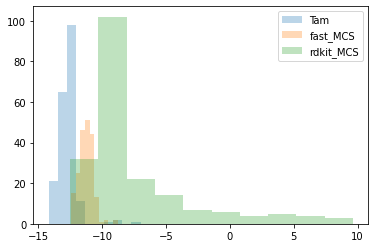

In [120]:
from collections import defaultdict
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

see = 'Mutations2'
for k in ['Tam', 'fast_MCS', 'rdkit_MCS']:
    df = pd.read_csv('outputs/%s_%s.csv' % (k, see))
    if k == 'Tam':
        baseline = np.mean(df['time'].tolist())
        print ('baseline: %.4f' % baseline)
    print (k, np.mean(df['time'].tolist())/baseline)
    plt.hist([np.log2(t) for t in df['time'].tolist()], label=k, alpha=0.3)

plt.legend()
plt.show()

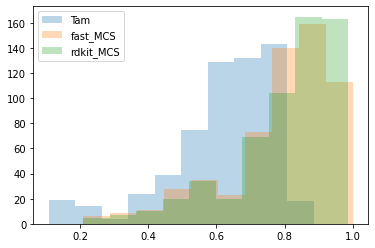

In [121]:
for k in ['Tam', 'fast_MCS', 'rdkit_MCS']:
    df = pd.read_csv('outputs/%s_%s.csv' % (k, see))
#     scores = [min([s[1], 1]) for ss in df['similar_mols'] for s in eval(ss)]
    scores = [s[1] for ss in df['similar_mols'] for s in eval(ss)]

    plt.hist(scores, label=k, alpha=0.3)

plt.legend()
plt.show()

In [122]:
sim_mols = {}
for k in ['Tam', 'rdkit_MCS', 'fast_MCS', 'hybrid']:
    df = pd.read_csv('outputs/%s_%s.csv' % (k, see))
    smiles = df['smiles'].tolist()
    mols = {}
    for i, ss in enumerate(df['similar_mols']):
        mols[i] = eval(ss)
    sim_mols[k] = mols

In [136]:
large_diff = []
pos_diff = []
for i in range(len(smiles)):
    diff = abs(sim_mols['Tam'][i][0][1]-sim_mols['fast_MCS'][i][0][1])
    if diff > 0.3:
        print ('L', i, sim_mols['Tam'][i][0][1]-sim_mols['fast_MCS'][i][0][1])
        large_diff.append(i)
    if sim_mols['Tam'][i][0][1]-sim_mols['fast_MCS'][i][0][1]>0:
        print ('P', i, sim_mols['Tam'][i][0][1]-sim_mols['fast_MCS'][i][0][1])
        pos_diff.append(i)

P 1 0.016079158936301796
P 4 0.08882783882783873
L 10 -0.31410256410256404
L 17 -0.32751937984496127
L 29 -0.5434782608695652
L 54 -0.3063063063063064
P 66 0.028869286287089013
L 95 -0.3942857142857143
P 105 0.19987349778621133
L 112 -0.35477941176470584
L 114 -0.3704545454545454
L 117 -0.3098471986417657
L 128 -0.3098471986417657
L 136 -0.3070175438596492
P 138 0.02631578947368418
L 160 -0.3699059561128527
L 164 -0.4696969696969697
L 165 -0.326530612244898
L 172 -0.3120204603580563
L 178 -0.36246672582076306
P 187 0.06676342525399126
L 192 -0.3848684210526315
L 198 -0.45345622119815676


Tam [0.47058823529411764, 0.45714285714285713, 0.4444444444444444]
rdkit_MCS [0.9166666666666666, 0.8695652173913043, 0.8333333333333334]
fast_MCS [0.782608695652174, 0.782608695652174, 0.75]
hybrid [0.6068660849090084, 0.5981337435350722, 0.5773502691896257]
[('C=CC(O)c1ccc2cc[nH]c2c1', 0.9166666666666666), ('ON=Cc1ccc2cc[nH]c2c1', 0.8695652173913043), ('CC(=NO)c1ccc2cc[nH]c2c1', 0.8333333333333334)]
OCc1ccc2cc[nH]c2c1


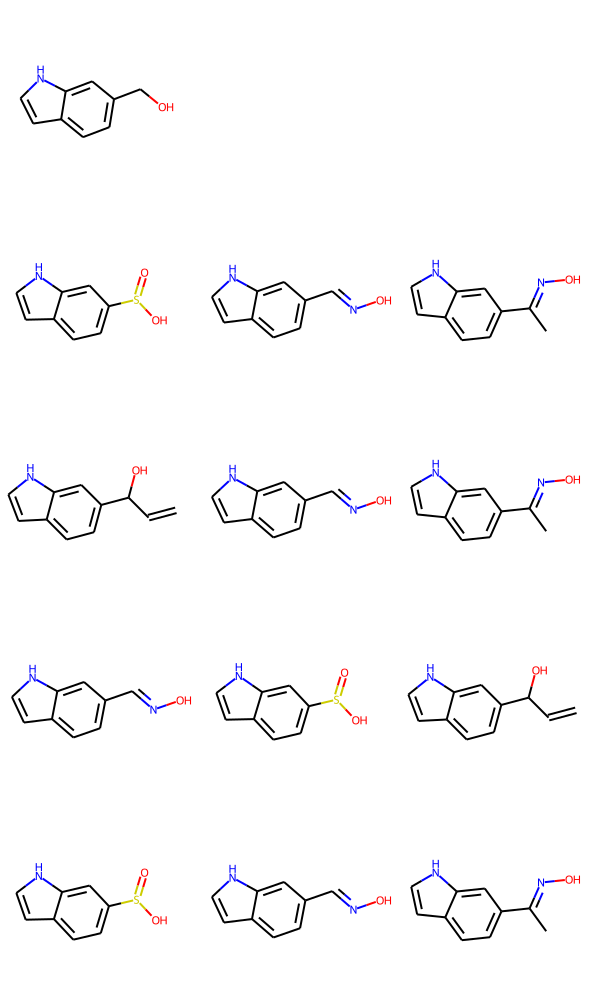

In [146]:
from rdkit import Chem
# 140, 20, 198, 95, 10

i = 172
sims = {}
display_mols = [smiles[i], 'H', 'H']
for k, v in sim_mols.items():
    display_mols += [vv[0] for vv in v[i]]
    print (k, [vv[1] for vv in v[i]])
    
print (sim_mols['rdkit_MCS'][i])
print (smiles[i])
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in display_mols])

baseline: 0.0002
Tam 1.0
fast_MCS 2.359076438843486
rdkit_MCS 28.045103766266386
hybrid 3.3590764388438252


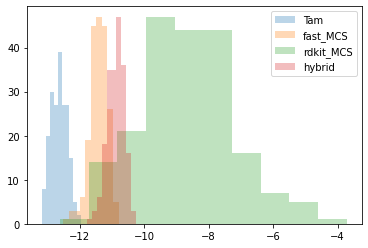

In [153]:
see = 'Sims2'
baseline = 0
for k in ['Tam', 'fast_MCS', 'rdkit_MCS', 'hybrid']:
    df = pd.read_csv('outputs/%s_%s.csv' % (k, see))
    if k == 'Tam':
        baseline = np.mean(df['time'].tolist())
        print ('baseline: %.4f' % baseline)
    print (k, np.mean(df['time'].tolist())/baseline)
    plt.hist([np.log2(t) for t in df['time'].tolist()], label=k, alpha=0.3)

plt.legend()
plt.show()

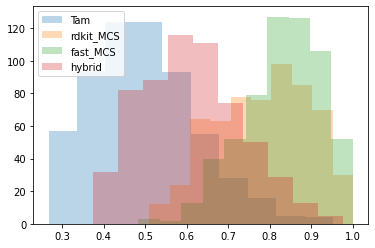

In [154]:
for k in ['Tam', 'rdkit_MCS', 'fast_MCS', 'hybrid']:
    df = pd.read_csv('outputs/%s_%s.csv' % (k, see))
    scores = [min([s[1], 1]) for ss in df['similar_mols'] for s in eval(ss)]
    plt.hist(scores, label=k, alpha=0.3)

plt.legend()
plt.show()

In [149]:
sim_mols = {}
for k in ['Tam', 'rdkit_MCS', 'fast_MCS', 'hybrid']:
    df = pd.read_csv('outputs/%s_%s.csv' % (k, see))
    smiles = df['smiles'].tolist()
    mols = {}
    for i, ss in enumerate(df['similar_mols']):
        mols[i] = eval(ss)
    sim_mols[k] = mols

In [150]:
large_diff = []
pos_diff = []
for i in range(len(smiles)):
    diff = abs(sim_mols['Tam'][i][0][1]-sim_mols['fast_MCS'][i][0][1])
    if diff > 0.3:
        print ('L', i, sim_mols['Tam'][i][0][1]-sim_mols['fast_MCS'][i][0][1])
        large_diff.append(i)
    if sim_mols['Tam'][i][0][1]-sim_mols['fast_MCS'][i][0][1]>0:
        print ('P', i, sim_mols['Tam'][i][0][1]-sim_mols['fast_MCS'][i][0][1])
        pos_diff.append(i)
# large_diff

L 1 -0.4478178368121442
L 3 -0.3058076225045372
L 4 -0.31746031746031744
L 5 -0.3076923076923077
L 6 -0.32360206602290587
L 7 -0.5272435897435898
L 8 -0.37857142857142856
L 9 -0.3359073359073359
L 10 -0.3290291726446676
L 14 -0.3916083916083916
L 16 -0.3954248366013071
L 18 -0.3340088430361091
L 20 -0.34574468085106386
L 21 -0.4157608695652174
L 22 -0.42307692307692313
L 27 -0.3145748987854251
L 28 -0.375
L 30 -0.4069319640564827
L 31 -0.5380952380952381
L 35 -0.48726355611601513
L 37 -0.33333333333333337
L 40 -0.44042232277526394
L 41 -0.3106060606060606
L 42 -0.41575091575091583
P 44 0.09912036043767436
L 47 -0.3317972350230415
L 48 -0.31868131868131866
L 49 -0.41125541125541126
L 54 -0.4379084967320261
L 55 -0.3347368421052631
L 61 -0.3464696223316913
L 62 -0.4704944178628389
L 64 -0.3783533765032378
L 65 -0.5618686868686869
L 66 -0.30833333333333335
L 67 -0.40126050420168063
L 71 -0.33499253359880543
L 72 -0.42928039702233256
L 74 -0.33772819472616633
L 75 -0.45115067303517153
L 80

Tam [0.4878048780487805, 0.47368421052631576, 0.4166666666666667]
rdkit_MCS [0.7777777777777778, 0.7555555555555555, 0.7428571428571429]
fast_MCS [0.8947368421052632, 0.7906976744186046, 0.7692307692307693]
hybrid [0.6606489204932593, 0.5619514869490163, 0.5239368319955838]
[('CC(C)(C)CCNC(=O)Cc1ccc(CN)cc1', 0.8947368421052632), ('CCCCCCCNCCc1ccc(CC(C)(C)C(=O)O)cc1', 0.7906976744186046), ('CCNC(=O)NCc1cccc(-c2ccc(C(C)(C)CCCNCC(C)(C)C)cc2O)c1', 0.7692307692307693)]
O=C(Nc1ccc(Cl)c(-c2ccccn2)c1)c1ccc(-n2cncn2)nc1


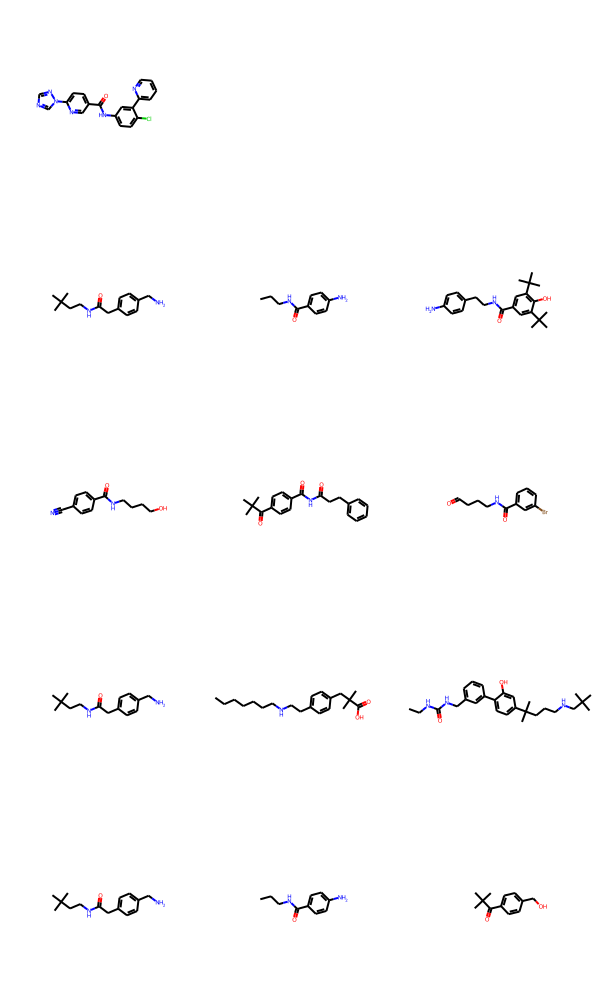

In [159]:
from rdkit import Chem

i = 30
sims = {}
display_mols = [smiles[i], 'H', 'H']
for k, v in sim_mols.items():
    display_mols += [vv[0] for vv in v[i]]
    print (k, [vv[1] for vv in v[i]])
    
print (sim_mols['fast_MCS'][i])
print (smiles[i])

Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in display_mols])

In [112]:
'COC(=O)[C@H](CCCCN)NC(=O)Nc1cc(OC)cc(C(C)(C)C)c1O' in smiles

False